### Introdução ao Machine Learning - Parte 2

Na "Introdução ao Machine Learning - Parte 2 (Classificação)", nós avançamos para um tipo específico de problema de machine learning chamado classificação. Aqui, o objetivo é prever a qual categoria ou classe um determinado dado pertence. Por exemplo, classificar um e-mail como spam ou não spam, identificar se uma transação bancária é fraudulenta ou não, ou mesmo prever se um paciente tem uma doença com base em seus sintomas.

A ideia fundamental por trás da classificação é treinar um modelo usando um conjunto de dados rotulados, ou seja, dados em que já conhecemos as categorias ou classes. O modelo aprende com esses dados e tenta encontrar padrões ou características que possam ser usados para prever a classe de novos dados não rotulados.

Existem vários algoritmos de classificação, cada um com suas próprias características e adequado para diferentes tipos de problemas. Alguns exemplos comuns incluem regressão logística, árvores de decisão, máquinas de vetores de suporte (SVM) e redes neurais.

Durante o processo de classificação, avaliamos a performance do modelo usando métricas como precisão, recall, pontuação F1 e matriz de confusão, entre outras, para garantir que nosso modelo esteja fazendo previsões precisas e confiáveis.

Em resumo, a "Introdução ao Machine Learning - Parte 2 (Classificação)" nos proporciona uma compreensão básica e fundamental de como os algoritmos de classificação funcionam e como podemos aplicá-los para resolver uma variedade de problemas do mundo real.

In [2]:
!pip3 install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.3 MB/s eta 0:00:0000:0100:01


In [3]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
df = pd.read_csv('breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

##### Com base nos registros dessa base, podemos dizer se é um tumor maligno ou não?

In [15]:
x = df.drop(columns=['id', 'diagnosis', 'Unnamed: 32'], axis=1)


In [16]:
y = df['diagnosis']

In [23]:
modelo = LogisticRegression(max_iter=10000)

In [24]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

In [25]:
modelo.fit(x_treino, y_treino)

LogisticRegression(max_iter=10000)

In [26]:
y_previsto = modelo.predict(x_teste)

In [27]:
# Uma matriz de confusão é uma tabela que é usada em problemas de classificação para descrever o desempenho de um modelo de machine learning. Ela permite visualizar a performance do modelo ao comparar as previsões feitas pelo modelo com as classes reais dos dados.


cm = confusion_matrix(y_previsto, y_teste)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

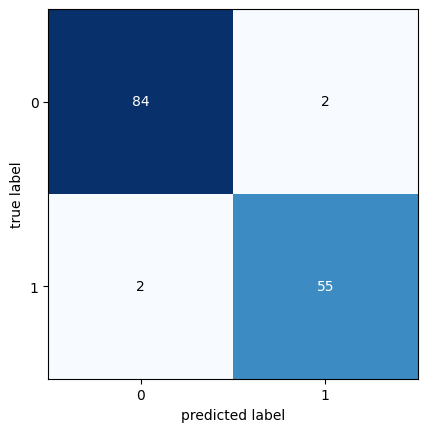

In [28]:
plot_confusion_matrix(cm)

In [29]:
# Avaliação de Classificação

print(classification_report(y_previsto, y_teste))

              precision    recall  f1-score   support

           B       0.98      0.98      0.98        86
           M       0.96      0.96      0.96        57

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



Vamos analisar a matriz de confusão no contexto do problema de classificação de tumores:

- **Verdadeiros Negativos (TN)**: 84
  - O modelo corretamente classificou 84 tumores benignos como benignos.
  
- **Falsos Positivos (FP)**: 2
  - O modelo incorretamente classificou 2 tumores benignos como malignos.
  
- **Falsos Negativos (FN)**: 2
  - O modelo incorretamente classificou 2 tumores malignos como benignos.
  
- **Verdadeiros Positivos (TP)**: 55
  - O modelo corretamente classificou 55 tumores malignos como malignos.

### Métricas de Avaliação

Vamos calcular algumas métricas importantes para a avaliação do modelo:

1. **Acurácia**: A proporção de todas as previsões corretas.

![Acurácia](Acurácia.png)

   **A acurácia é aproximadamente 97.2%.**

2. **Precisão (Precision)**: A proporção de verdadeiros positivos entre as previsões positivas.

![Precisão](Precisão.png)

   **A precisão é aproximadamente 96.5%.**

3. **Recall (Sensibilidade ou TPR)**: A proporção de verdadeiros positivos entre as reais instâncias positivas.

![Recall](Recall.png)

   **O recall é aproximadamente 96.5%.**

4. **F1-Score**: A média harmônica da precisão e do recall.

![F1-Score](F1-Score.png)

   **O F1-Score é aproximadamente 96.5%.**

### Interpretação

- **Baixo número de falsos positivos (FP = 2)**: Apenas 2 tumores benignos foram classificados incorretamente como malignos. Isso é importante para evitar alarme desnecessário.
- **Baixo número de falsos negativos (FN = 2)**: Apenas 2 tumores malignos foram classificados incorretamente como benignos. Isso é crítico, pois errar nessa situação pode atrasar o tratamento necessário.
- **Alta acurácia, precisão, recall e F1-Score**: Indicam que o modelo está se saindo muito bem na classificação dos tumores.

### Conclusão

Dado o alto desempenho do modelo, especialmente com a baixa taxa de falsos negativos, ele pode ser uma ferramenta valiosa para auxiliar na detecção de tumores malignos. No entanto, mesmo com uma alta precisão, um modelo de machine learning deve ser usado em conjunto com a experiência clínica. A decisão final sobre a natureza de um tumor deve sempre ser confirmada por um profissional de saúde.

Se for necessário de mais melhorias no modelo, podemos considerar:

- **Obter mais dados**: Mais dados podem ajudar a melhorar a performance do modelo.
- **Tuning de hiperparâmetros**: Ajustar os hiperparâmetros do modelo pode ajudar a melhorar a precisão e o recall.
- **Teste com diferentes algoritmos**: Alguns algoritmos podem se sair melhor dependendo do conjunto de dados específico.


**Quanto à substituição de um médico oncologista:**
Apesar do bom desempenho, um modelo de machine learning deve ser usado como uma ferramenta de suporte à decisão e não como substituto de um profissional médico. Os diagnósticos de câncer envolvem considerações clínicas complexas e experiência que um modelo sozinho não pode fornecer. Portanto, embora o modelo seja uma ferramenta valiosa para ajudar na triagem e nas decisões, ele não deve substituir um oncologista na prática clínica.

##### Exercícios de fixação

**Questão 1**

Qual destas não é uma métrica de classificação?


R: **Erro Médio Absoluto**

**Questão 2**

Considere que você está fazendo uma classificação para prever Churn (evasão) de clientes de um banco, com o objetivo de distinguir entre clientes satisfeitos e evasões.
Qual métrica deve ser a otimizada no algoritmo?

R: **Recall da pessoa evadindo**